<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/mlp/diabetes/task3/feed_foward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [3]:
csv_file = 'https://raw.githubusercontent.com/carvalheirafc/deep_learning_stuff/master/mlp/diabetes/diabetes_pca_result.csv'
df = pd.read_csv(csv_file)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Component 1,768.0,-6.693141e-17,1.711960,-5.587340,-1.027072,0.152931,1.095689,5.963579
Component 2,768.0,-6.071532e-17,1.318184,-2.955806,-1.007096,-0.225966,0.959128,3.606582
Component 3,768.0,-3.324887e-17,1.015629,-3.203088,-0.646496,-0.103940,0.549774,4.754503
Component 4,768.0,2.349105e-18,0.966941,-2.192185,-0.664677,-0.115829,0.543242,4.125987
Diagnóstico,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [48]:
features = df.drop('Diagnóstico', axis=1).values
labels = df['Diagnóstico'].values

print(features.shape)
print(labels.shape)

(768, 4)
(768,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.33, 
                                                    random_state=666)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(514, 4)
(254, 4)
(514,)
(254,)


In [99]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128, activation='relu', input_dim=4))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train,
          epochs=20,
          batch_size=128)

score = model.evaluate(X_test, y_test, batch_size=128)
score

Epoch 1/20
514/514 [==============================] - 0s 236us/sample - loss: 0.6701 - acc: 0.6109
Epoch 2/20
514/514 [==============================] - 0s 36us/sample - loss: 0.6044 - acc: 0.6984
Epoch 3/20
514/514 [==============================] - 0s 34us/sample - loss: 0.5808 - acc: 0.6965
Epoch 4/20
514/514 [==============================] - 0s 35us/sample - loss: 0.5762 - acc: 0.7043
Epoch 5/20
514/514 [==============================] - 0s 32us/sample - loss: 0.5445 - acc: 0.7276
Epoch 6/20
514/514 [==============================] - 0s 38us/sample - loss: 0.5608 - acc: 0.7160
Epoch 7/20
514/514 [==============================] - 0s 37us/sample - loss: 0.5672 - acc: 0.6926
Epoch 8/20
514/514 [==============================] - 0s 37us/sample - loss: 0.5558 - acc: 0.7218
Epoch 9/20
514/514 [==============================] - 0s 38us/sample - loss: 0.5453 - acc: 0.7082
Epoch 10/20
514/514 [==============================] - 0s 38us/sample - loss: 0.5500 - acc: 0.7374
Epoch 11/20
514/51

[0.5048009049235367, 0.7401575]

In [101]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


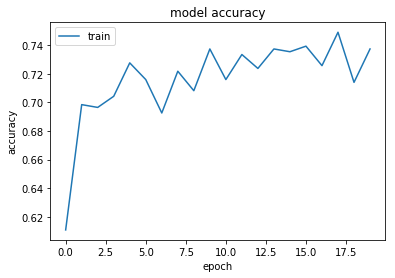

In [102]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()